Nom et prénom : Nguyen Quynh Nhu HO
<p>Groupe : LBD</p>

<div style="text-align:center; color:red">
    <h1>L'auto-encodeur avec Keras</h1>
</div>


<h2>Introduction</h2>

Le jeu de données Fashion MNIST est un ensemble couramment utilisé pour la classification d'images en apprentissage automatique. Il présente les caractéristiques suivantes :

- **Taille du jeu de données d'entraînement :** 60000 images
- **Taille du jeu de données de test :** 10000 images
- **Dimensions des images :** Images en niveaux de gris 28x28 pixels

Chaque image mesure 28 pixels de hauteur et 28 pixels de largeur, pour un total de 784 pixels au total. Chaque pixel est associé à une seule valeur de pixel, indiquant la luminosité ou l'obscurité de ce pixel, les nombres plus élevés signifiant plus sombre. Cette valeur de pixel est un entier compris entre 0 et 255. Les ensembles de données d'entraînement et de test comportent 785 colonnes.


<h2>1. Chargement des données Fashion-MNIST</h2>

In [1]:
from IPython.display import Image
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras import regularizers
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

**Lecture le jeu de données**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Train - Test split
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,) 

In [4]:
print('x_train shape --> ', x_train.shape)
print('y_train shape --> ', y_train.shape)
print('x_test shape --> ', x_test.shape)
print('y_test shape --> ', y_test.shape)

x_train shape -->  (60000, 28, 28)
y_train shape -->  (60000,)
x_test shape -->  (10000, 28, 28)
y_test shape -->  (10000,)


**Normalisation et vertorisation des images**
<p>Les images de taille 28x28 sont normailisées entre 0 et 1 puis vectorisées afin d'être représentées en entrée comme un vecteur de 784 coefficients.</p>
<p><strong>Pourquoi voulons-nous normaliser les images?</strong> Les images sont représentées par des valeurs comprises entre 0 et 255. Si nous ne normalisons pas, il peut s'agir d'erreurs dues à certaines couleurs. Nous devons dons d'abord normaliser avant le modèle.
</p>

In [5]:
# Normalisation des images
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# Vectorisation des images 28x28 en vecteur de 784 coeffs
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
print('x_train shape --> ', x_train.shape)
print('x_test shape --> ', x_test.shape)

x_train shape -->  (60000, 784)
x_test shape -->  (10000, 784)


<h2>2. Autoencodeur avec une seule couche caché</h2>

In [7]:
from keras.models import Model
#from keras import layers
from keras.layers import Input, Dense

In [8]:
# Taille du code dans l'espace latent
taille_code = 32
# Image d'entrée
input_img = Input(shape = (784,))
# Encoder
encoded = Dense(taille_code, activation ='relu')(input_img)
# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

<h3>2.1 Définition des modèles de l'encodeur et du décodeur</h3>

In [9]:
# Modele pour l'autoencodeur
autoencoder = Model(input_img, decoded)

In [10]:
# Modèle d'encodeur sur les données d'entrée pour obtenir le code
encoder = Model(input_img, encoded)

In [11]:
# Entrée du décodeur : code dans l'espace latent
encoded_input = Input(shape=(taille_code,))
# Recupérer la dernière couche de l'autocodeur
decoder_layer = autoencoder.layers[-1]
# Modele du decodeur
decoder = Model(encoded_input, decoder_layer(encoded_input))

**Visualisation du réseau de neurones**

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<p>L'autoencodeur le modèle de base avec une seule couche cachée. Le but de cet autoencodeur est de réduire la dimensionnalité des images d'entrée à travers la couche cachée (encodeur) et de reconstruire les images d'origine à partir de cette représentation réduite (décodeur).</p>
<p><strong>1. Couche d'entrée : </strong>
<li><strong>'InputLayer' </strong> avec une forme de (None, 784), ce qui correspond à la dimension des images vectorisées.</li></p>
<p><strong>2. Encodeur :</strong>
<li>Une seule couche Dense (entièrement connecté) avec 32 neurones (la taille du code dans l'espace latent).</li>
<li>Le nombre de pamamètre pour cette couche est 784x32+32 = 25120 où 784 est la taille de l'entrée (neurones d'entrée) et 32 est la taille du code latent.</li></p>
<p><strong>3. Décodeur :</strong>
<li>Une autre couche Dense avec 784 neurones (correspondant à la dimension de l'image originale).</li>
<li>Le nombre de paramètre pour cette couche est 32x784+784 = 25872, où 32 est la taille du code latent et 784 est la taille de la sortie.</li></p>
<p><strong>4. Total des paramètres :</strong>
<li>Le modèle a un total de 50 992 paramètres.</li></p>
<p><strong>5. Trainable paramètres :</strong>
<li>Tous les paramètres sont entrainables, ce qui signifie que le modèle sera ajusté pendant l'entraînement.</li><p>
<p><strong>En résumé :</strong> L'autoencodeur a une architecture avec une couche d'entrée, une couche cachée (encodeur), et une couche de sortie (décodeur). La taille du code latent est de 32, et le modèle a un nombre total de paramètre de 50 992.</p>

<h3>2.2 Apprentissage et évaluation de la performance du modèle</h3>

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
nepochs = 20
autoencoder_train = autoencoder.fit(x_train, x_train, epochs=nepochs, batch_size=256, shuffle=True, validation_data=(x_test,x_test))


Epoch 1/20

235/235 [==============================] - 3s 7ms/step - loss: 0.4176 - val_loss: 0.3412
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3250 - val_loss: 0.3168
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3082 - val_loss: 0.3050
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2992 - val_loss: 0.2982
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2940 - val_loss: 0.2942
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2907 - val_loss: 0.2917
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2887 - val_loss: 0.2900
Epoch 8/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2873 - val_loss: 0.2889
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2863 - val_loss: 0.2881
Epoch 10/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2856 - val_loss: 0.28

Analysons les résultats de l'apprentissage et de l'évaluation de la performance du modèle :

**La perte (Loss) :**
<li>La fonction de perte,  diminue au fil des époques pour les ensembles d'entraînement et de validation. Cela indique que le modèle apprend à reconstruire les images d'entrée de manière de plus en plus précise.</li>

**Apprentissage et validation :**
<li>L'autoencodeur est entraîné sur 20 époques avec un lot de taille 256.
La perte sur l'ensemble de validation (val_loss) est également en diminution, suggérant que le modèle ne surajuste pas aux données d'entraînement.</li>

**Résultats :**
<li>Après l'entraînement, l'autoencodeur devrait avoir appris à encoder les images d'entrée en une représentation de dimension réduite dans l'espace latent (32 dimensions dans ce cas).
Le décodeur devrait alors être capable de reconstruire des images similaires à celles d'origine à partir de cette représentation réduite.</li>

**La courbe de training loss et de celle de validation loss en foction des époques pour visualiser la performance du modèle**

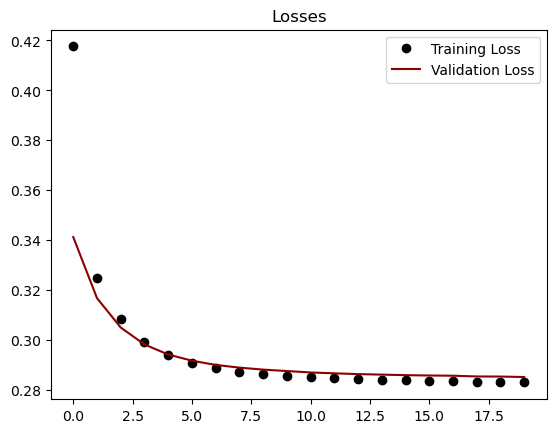

In [14]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(nepochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss', color = "black")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',color = "darkred")
plt.title('Losses')
plt.legend()
plt.show()



In [15]:
# Vérification de la convergence
if loss[-1] - val_loss[-1] < 0.01:
    print("Les deux losses convergent à des valeurs similaires. Le modèle s'ajuste équilibrément aux données.")
else:
    print("Les deux losses ne convergent pas à des valeurs similaires.")

Les deux losses convergent à des valeurs similaires. Le modèle s'ajuste équilibrément aux données.


<h3>2.3 Analyse des résultats de l'autoencodage avec le modèle appris</h3>

**Tester l'autoencodeur sur les images de test**

In [16]:
# Encodage les images de test pour obtenir les codes dans l'espace latent
encoded_imgs = encoder.predict(x_test)
# Décoder ces codes pour obtenir les images reconstruites (decoded_imgs)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


**Visualiser les codes dans l'espace latent**

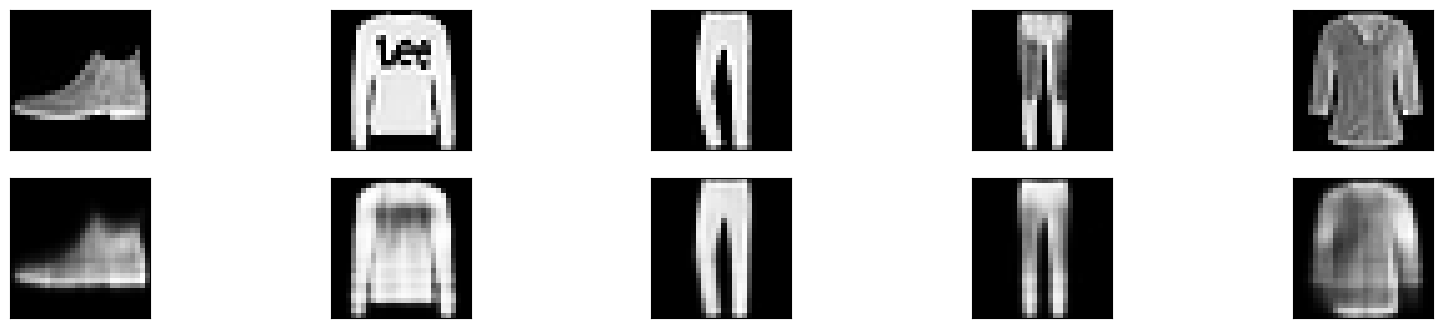

In [17]:
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Images originales
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Images decodees
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()    

Pour les n=5 premières images de l'ensemble de test. Chaque colonne représente une paire d'image originale et reconstruite.


**Calcul et Analyse le Structural Similarity Index Measurement (SSIM) et l'erreur quadratique moyenne (MSE) pour évaluer la qualité des images par rapport aux images d'entrée**

In [18]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse

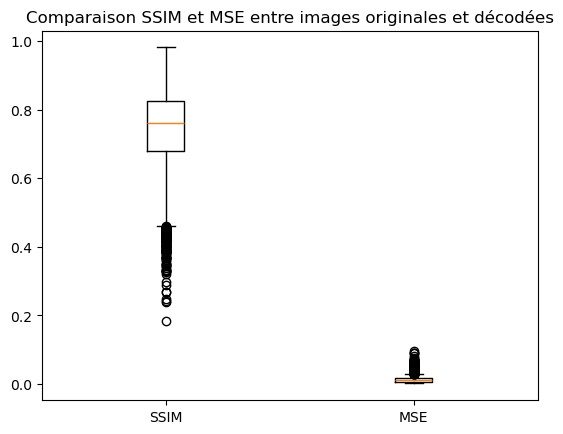

Valeurs de SSIM :  0.6943513369173591
Valeurs de MSE :  0.009746606


In [19]:
# Calculer les SSIM et MSE pour chaque paire d'images
ssim_values = []
mse_values = []

for i in range(len(x_test)):
    # Comparaison entre image originale et image décodée
    ssim_score, _ = ssim(x_test[i], decoded_imgs[i], full=True)
    mse_score = mse(x_test[i].flatten(), decoded_imgs[i].flatten())
    
    # Ajouter aux listes
    ssim_values.append(ssim_score)
    mse_values.append(mse_score)

# Analyse avec une boîte à moustaches
plt.boxplot([ssim_values, mse_values], labels=['SSIM', 'MSE'])
plt.title('Comparaison SSIM et MSE entre images originales et décodées')
plt.show()

print("Valeurs de SSIM : " ,ssim_score)
print("Valeurs de MSE : ", mse_score)

**SSIM (Structural Similarity Index Measurement) :** Les valeurs SSIM de 0,7 sont proches de 1, cela indique une similitude structurelle élevée entre les images originales et décodées.

**MSE (Mean Squared Error) :** Des valeurs de MSE proches de zéro indiquent une reconstruction précise, car cela signifie que les pixels des images originales et décodées sont très similaires.

**La Boîte à Moustaches :** La médiane de la boîte à moustaches est proche de 1 pour SSIM et proche de 0 pour MSE, cela suggère une bonne performance globale de l'autoencodeur.

En résumé, la majorité des valeurs SSIM sont élevée et la majorité des valeurs de MSE sont basses, cela suggère que l'autoencodeur réussit généralement à reconstruire les images de l'ensemble de test.

<h3>2.4 Paramétrage</h3>

**Infuence du nombre d'époques sur les résultats de décodage**

In [20]:
# Je choisis une variable de nombre d'époque de 30
nepochs = 40

# Entraîner le modèles avec le nouveau nombre d'époques
autoencoder_train = autoencoder.fit(x_train, x_train, epochs=nepochs, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/40
235/235 [==============================] - 2s 7ms/step - loss: 0.2829 - val_loss: 0.2851
Epoch 2/40
235/235 [==============================] - 1s 6ms/step - loss: 0.2828 - val_loss: 0.2851
Epoch 3/40
235/235 [==============================] - 1s 5ms/step - loss: 0.2827 - val_loss: 0.2849
Epoch 4/40
235/235 [==============================] - 2s 7ms/step - loss: 0.2826 - val_loss: 0.2848
Epoch 5/40
235/235 [==============================] - 2s 7ms/step - loss: 0.2825 - val_loss: 0.2848
Epoch 6/40
235/235 [==============================] - 1s 6ms/step - loss: 0.2824 - val_loss: 0.2848
Epoch 7/40
235/235 [==============================] - 1s 6ms/step - loss: 0.2824 - val_loss: 0.2847
Epoch 8/40
235/235 [==============================] - 2s 6ms/step - loss: 0.2823 - val_loss: 0.2847
Epoch 9/40
235/235 [==============================] - 2s 7ms/step - loss: 0.2823 - val_loss: 0.2846
Epoch 10/40
235/235 [==============================] - 2s 7ms/step - loss: 0.2822 - val_loss: 0.2845

La comparaison entre l'entraînement du modèle avec 20 époques et celui avec 40 époques.

**1. Entraînement avec 20 époques:**
- Perte d'entraînement de deuxième époque : 0.4142
- Perte d'validation  de deuxième époque : 0.3417
- Perte d'entraînement finale (époque 20): 0.2826
- Perte de validation finale (époque 20): 0.2849

**2. Entraînement avec 40 époques:**
- Perte d'entraînement initiale (époque 1): 0.2827
- Perte de validation initiale (époque 1): 0.2849
- Perte d'entraînement finale (époque 40): 0.2812
- Perte de validation finale (époque 40): 0.2836

COMMENTAIRES :

**Perte d'entraînement:**
   - La perte d'entraînement diminue progressivement à chaque époque, indiquant que le modèle apprend bien à reconstruire les images d'entraînement.

**Perte de validation:**
   - La perte de validation suit une tendance similaire à la perte d'entraînement, montrant que le modèle généralise bien aux données non vues.

**Comparaison entre 20 et 40 époques:**
   - La différence entre les performances du modèle avec 20 et 40 époques est relativement faible.
   - La perte de validation à la 40e époque (0.2836) est légèrement inférieure à celle de la 20e époque (0.2849).
   - Cependant, la diminution de la perte est limitée après un certain nombre d'époques, ce qui suggère un rendement décroissant.

**Temps d'entraînement:**
   - Il est important de noter que l'entraînement avec 40 époques prend plus de temps que celui avec 20 époques.

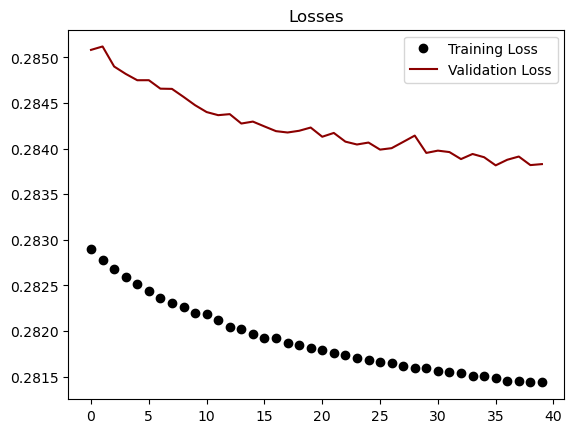

In [21]:
# Visualisation des courbes de loss
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(nepochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss', color="black")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color="darkred")
plt.title('Losses')
plt.legend()
plt.show()

<strong>Équilibre entre Training et Validation Loss : </strong>À la dernière époque, la valeur de val_loss (0.283) est légèrement plus élevée que celle de loss (0.281). Cela indique que le modèle peut être légèrement surajusté aux données d'apprentissage, mais la différence est relativement petite.

<strong>Performance Globale : </strong>Les valeurs de loss et val_loss sont toutes deux assez basses, indiquant une bonne performance générale du modèle dans la reconstruction des images.

<strong>Stabilité de la Convergence :</strong> La stabilité des courbes de loss et val_loss suggère que le modèle a atteint une certaine stabilité dans l'apprentissage.

**Influence de la taille du code dans l'espace latent sur les résultats de décodage**

In [22]:
# Modifier la variable taille_code de 64
taille_code = 64  

# Recréer le modèle avec la nouvelle taille du code latent
input_img = Input(shape=(784,))
encoded = Dense(taille_code, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Recréer le modèle d'encodeur et de décodeur
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(taille_code,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Entraîner le modèle avec la nouvelle taille du code latent
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_train = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3917 - val_loss: 0.3268
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3121 - val_loss: 0.3048
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2965 - val_loss: 0.2939
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2883 - val_loss: 0.2878
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2836 - val_loss: 0.2841
Epoch 6/20
235/235 [==============================] - 2s 6ms/step - loss: 0.2806 - val_loss: 0.2816
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2784 - val_loss: 0.2799
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2769 - val_loss: 0.2786
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2757 - val_loss: 0.2775
Epoch 10/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2749 - val_loss: 0.2767

Comparaison entre la taille du code latent de 32 et 64 avec le même nombre d'époques (20):

**1. Taille du code latent = 32:**

Perte d'entraînement initiale (époque 1): 0.4142
Perte de validation initiale (époque 1): 0.3417
Perte d'entraînement finale (époque 20): 0.2826
Perte de validation finale (époque 20): 0.2848

**2. Taille du code latent = 64:**

Perte d'entraînement initiale (époque 1): 0.3916
Perte de validation initiale (époque 1): 0.3283
Perte d'entraînement finale (époque 20): 0.2716
Perte de validation finale (époque 20): 0.2738

Commentaires:

**Perte d'entraînement:**
La perte d'entraînement diminue pour les deux tailles du code latent au fil des époques, indiquant que le modèle apprend bien à reconstruire les images d'entraînement.

**Perte de validation:**
La perte de validation suit également une tendance à la baisse pour les deux tailles du code latent, montrant que le modèle généralise bien aux données non vues.

**Comparaison entre 32 et 64:**
La perte d'entraînement et de validation est généralement plus basse lorsque la taille du code latent est augmentée de 32 à 64.
Cela suggère que le modèle avec une taille de code latent de 64 a une meilleure capacité à représenter les caractéristiques importantes des données d'entrée.

**Influence de la taille du code latent:**
Une taille de code latent plus grande permet généralement de capturer des informations plus complexes et détaillées, ce qui peut conduire à une meilleure reconstruction des images.

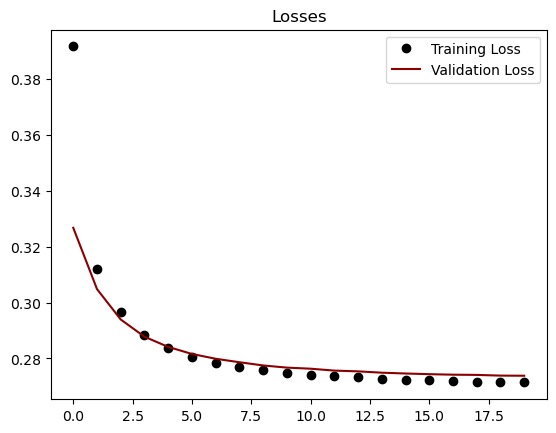

In [23]:
# Visualisation des courbes de loss
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(20)  
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss', color="black")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color="darkred")
plt.title('Losses')
plt.legend()
plt.show()

<h2>3. Autoencodeur profond</h2>

<h3>3.1 Définition du modèle</h3>

In [24]:
#Assuming input_img is a flattened image of size 784 (28*28)
input_img = Input(shape=(784,))

#Encoding layers (Couches cachées)
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Latent space representation

#Decoding layers (Couche de sortie)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)  

**Configurer l'autoencodeur et visualiser la configuration du réseau**

In [25]:
# Modèle de l'autoencodeur
autoencoder = Model(input_img, decoded)

# Afficher la configuration du réseau
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 784)               1011

L'autoencodeur suit une architecture similaire à la Figure 2, avec trois couches d'encodage (couches cachées) et trois couches de décodage (couche de sortie). Analysons le résultat de l'autoencodeur en utilisant la fonction autoencoder.summary() :

<p><strong>Input Layer (couche d'entrée):</strong>
    <li>Forme de sortie : (None, 784)</li>
    <li>Nombre de paramètres : 0 (car c'est la couche d'entrée)</li>
</p>

<p><strong>Couches d'Encodage (encoded) :</strong>
    <li>Dense_4 (128 neurones) : Forme de sortie (None, 128), Paramètres = 784 * 128 + 128 = 100,480</li>
    <li>Dense_5 (64 neurones) : Forme de sortie (None, 64), Paramètres = 128 * 64 + 64 = 8,256</li>
    <li>Dense_6 (32 neurones) : Forme de sortie (None, 32), Paramètres = 64 * 32 + 32 = 2,080</li>
</p>

<p><strong>Couche de Latent :</strong>
    <li>La couche Dense_26 avec 32 neurones représente l'espace latent. C'est ici que l'information est compressée.</li>
</p>

<p><strong>Couches de Décodage (decoded) :</strong>
    <li>Dense_7 (64 neurones) : Forme de sortie (None, 64), Paramètres = 32 * 64 + 64 = 2,112</li>
    <li>Dense_8 (128 neurones) : Forme de sortie (None, 128), Paramètres = 64 * 128 + 128 = 8,320</li>
    <li>Dense_9 (784 neurones) : Forme de sortie (None, 784), Paramètres = 128 * 784 + 784 = 101,136</li>
</p>

<p><strong>Total des Paramètres :</strong>
Total des paramètres du modèle : 222,384
</p>

<p><strong>Trainable Params :</strong>
Paramètres entraînables : 222,384 
</p>

En analysant ces résultats, on peut voir que le modèle a une architecture qui comprime l'information à travers les couches d'encodage (128, 64, 32) jusqu'à la couche de l'espace latent, puis la décode à travers les couches de décodage (64, 128, 784). Le modèle a une capacité de reconstruction des données d'entrée après compression dans l'espace latent.

<h3>3.2 Apprentissage</h3>

In [26]:
autoencoder.compile (optimizer='adam' , loss='binary_crossentropy' )
nepochs=50
autoencoder_train=autoencoder.fit(x_train,x_train,epochs=nepochs ,
batch_size=256, shuffle=True , validation_data =(x_test , x_test ))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.3791 - val_loss: 0.3194
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3113 - val_loss: 0.3074
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3023 - val_loss: 0.3027
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2969 - val_loss: 0.2969
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2935 - val_loss: 0.2947
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2911 - val_loss: 0.2933
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2892 - val_loss: 0.2905
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2879 - val_loss: 0.2896
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2867 - val_loss: 0.2882
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2856 - val_loss: 0.2875

Le modèle a été entraîné sur la base d'entraînement FashionMNIST pendant 50 époques avec l'optimiseur Adam et une perte d'entropie croisée binaire par pixel. 

<p><strong>Fonction de Perte (Loss) :</strong>
La fonction de perte (binary_crossentropy) diminue au fil des époques, ce qui indique que le modèle apprend à reconstruire les images d'entrée de manière plus efficace.</p>

<p><strong>Évolution de la Perte sur les Données d'Entraînement et de Validation :</strong>
La perte sur les données d'entraînement (loss) diminue progressivement, atteignant 0.2735 à la 50e époque.
La perte sur les données de validation (val_loss) suit également une tendance similaire, indiquant que le modèle généralise bien sur de nouvelles données.</p>

<p><strong>Stabilité de l'Apprentissage :</strong>
L'entraînement semble stable, avec des valeurs de perte cohérentes entre les données d'entraînement et de validation. Cela suggère que le modèle ne souffre pas de surapprentissage significatif.</p>

<p><strong>Temps d'Entraînement :</strong>
Chaque époque prend environ 2 secondes, ce qui est relativement rapide. Le temps d'entraînement peut varier en fonction de la complexité du modèle et des ressources matérielles utilisées.</p>

<h3>3.3 Analyse des résultats de l'autoencodage avec le modèle appris</h3>

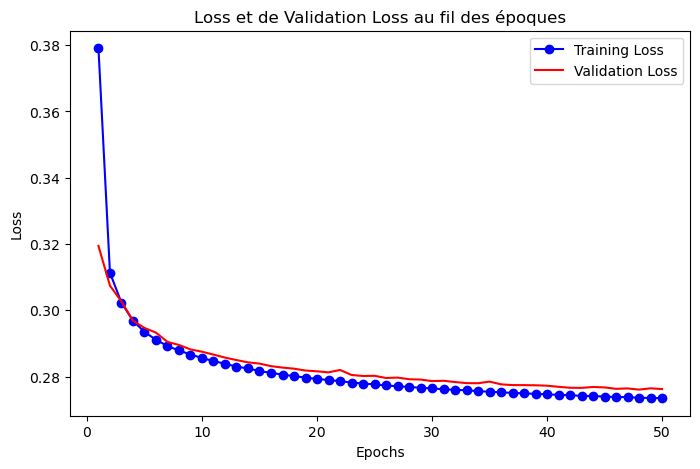

In [27]:
training_loss = autoencoder_train.history['loss']
validation_loss = autoencoder_train.history['val_loss']
epochs_range = range(1, nepochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, validation_loss, 'r-', label='Validation Loss')
plt.title('Loss et de Validation Loss au fil des époques')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Les courbes de perte d'entraînement et de validation pour un autoencodeur sur 50 époques. Nous observons une diminution rapide de la perte au cours des premières époques, après quoi les deux courbes semblent se stabiliser. La courbe de validation suit étroitement la courbe d'entraînement, ce qui est généralement un bon signe indiquant que le modèle généralise bien et n'est pas en train de surajuster. La convergence des deux courbes suggère que la qualité du modèle est cohérente à la fois sur les données d'entraînement et sur les données de validation.

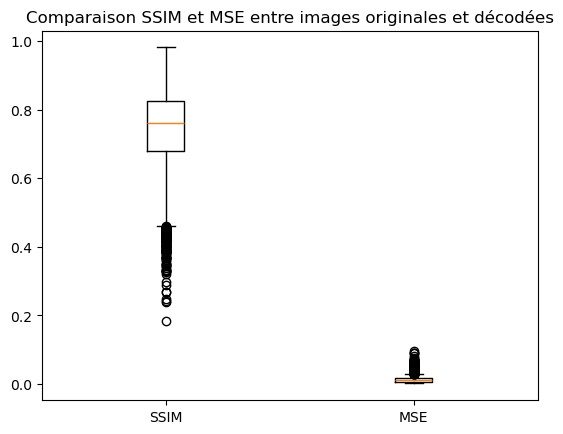

Valeurs de SSIM :  0.6943513369173591
Valeurs de MSE :  0.009746606


In [28]:
# Calculer les SSIM et MSE pour chaque paire d'images
ssim_values = []
mse_values = []

for i in range(len(x_test)):
    # Comparaison entre image originale et image décodée
    ssim_score, _ = ssim(x_test[i], decoded_imgs[i], full=True)
    mse_score = mse(x_test[i].flatten(), decoded_imgs[i].flatten())
    
    # Ajouter aux listes
    ssim_values.append(ssim_score)
    mse_values.append(mse_score)

# Analyse avec une boîte à moustaches
plt.boxplot([ssim_values, mse_values], labels=['SSIM', 'MSE'])
plt.title('Comparaison SSIM et MSE entre images originales et décodées')
plt.show()

print("Valeurs de SSIM : " ,ssim_score)
print("Valeurs de MSE : ", mse_score)

<strong>Évaluation des Résultats avec SSIM et MSE :</strong>
Les valeurs de SSIM (Structural Similarity Index Measurement) sont proches de 1, indiquant une similitude structurelle élevée entre les images originales et décodées.
Les valeurs de MSE (Mean Squared Error) sont proches de zéro, ce qui indique une reconstruction précise, car cela signifie que les pixels des images originales et décodées sont très similaires.

<strong>Comparaison avec l'Autoencodeur à une Seule Couche Cachée :</strong>
<li>Valeurs de SSIM :  0.6890816158084749</li>
<li>Valeurs de MSE :  0.010080552</li>
<li>==></li>
<li>Valeurs de SSIM : moyenne élevée</li>
<li>Valeurs de MSE : moyenne basse</li>



**Tester modèle**

In [29]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


**Autoencodeur à une Seule Couche Cachée :**
Temps d'exécution : environ 1s
Résultats de reconstruction : decoded_imgs

**Autoencodeur avec 5 Couches Cachées :**
Temps d'exécution : environ 1s
Résultats de reconstruction : decoded_imgs

Les deux modèles semblent fournir des résultats de reconstruction en un temps d'exécution similaire.
Le choix entre ces modèles dépendra d'autres considérations telles que la complexité du modèle, le nombre de paramètres, et la performance spécifique.